### <h3><center>Final Project - Cardio</center></h3>
<center>DSC 550</center>
<center>Sam Loyd</center>
<center>May 2020</center>

As you go through this tutorial, using everything you’ve learned in the first half of this class, it is time to start developing your own original Analysis Case Study.

Provide a short narrative describing an original idea for an analysis problem. Find or create appropriate data that can be analyzed.

Write the step-by-step instructions for completing the Graph Analysis part of your case study.

#### Part 1

You will post Part 1 of your Case Study (including the data) to the Week 7 Discussion Forum. This is due by the end of Week 6. This is a cumulative project so it is imperative that you do not fall behind.

Submit the Sample Code for Part 1 to the Submission Link. Do not post the Sample Code to the Week 7 Discussion Forum with your project!

Review and provide feedback to one of your classmate’s Case Study Part 1 assignments which are posted to the Week 7 Discussion Forum. Also review the feedback you receive on your Part 1 assignment. Make any changes you think necessary.

#### Part 2

Create Part 2 of your Analysis Case Study project. Part 2 should consist of Dimensionality and Feature Reduction. You can use any methods/tools you think are most appropriate.

Write the step-by-step instructions for completing the Dimensionality and Feature Reduction part of your case study.

You will post Part 2 of your Case Study (including the data) to the Week 8 Discussion Forum. This is due by the end of Week 7. This is a cumulative project so it is imperative that you do not fall behind.

Submit the Sample Code for Part 1&2 to the Submission Link. Do not post the Sample Code to the Week 8 Discussion Forum with your project!

Review and provide feedback to one of your classmate’s Case Study Part 2 assignments which are posted to the Week 8 Discussion Forum. Also review the feedback you receive on your Part 2 assignment. Make any changes you think necessary.

#### Part 3

Create Part 3 of your Analysis Case Study project. Part 3 should consist of Model Evaluation and Selection. You can use any methods/tools you think are most appropriate.

Write the step-by-step instructions for completing the Model Evaluation and Selection part of your case study.

You will post the entire Case Study (including the data) to the Week 9 Discussion Forum. This is due by the end of Week 8. This is a cumulative project so it is imperative that you do not fall behind.

Submit the completed Case Study Part 3 to the Submission Link. Do not post the Sample Code to the Discussion Forum.

In [1]:
# Required Libraries
# Disable warning on yellowbrick which will have a 
# deprecation in 2.4 of sklearn

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import yellowbrick
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import pickle

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical 
from sklearn.preprocessing import LabelEncoder

from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.neural_network import MLPRegressor, MLPClassifier

import numpy as np
from scipy import stats

Using TensorFlow backend.


In [2]:
# Load the CSV.  
# Step 3:  Load data into a dataframe
addr1 = "heart.csv"
cardiodf = pd.read_csv(addr1)
# cardio_orig_df = cardiodf

In [3]:
# Step 4:  check the dimension of the table
print("The dimension of the table is: {}".format(cardiodf.shape))

The dimension of the table is: (1190, 12)


In [4]:
cardiodf.rename(columns = {'age':'Age'}, inplace = True)
cardiodf.rename(columns = {'sex':'Sex'}, inplace = True)
cardiodf.rename(columns = {'chest pain type':'Chest_Pain'}, inplace = True)
cardiodf.rename(columns = {'resting bp s':'Rest_Systolic'}, inplace = True)
cardiodf.rename(columns = {'cholesterol':'Cholesterol'}, inplace = True)
cardiodf.rename(columns = {'fasting blood sugar':'Fast_Glucose'}, inplace = True)
cardiodf.rename(columns = {'resting ecg':'Rest_ECG'}, inplace = True)
cardiodf.rename(columns = {'exercise angina':'Ex_Angina'}, inplace = True)
cardiodf.rename(columns = {'oldpeak':'Old_Peak'}, inplace = True)
cardiodf.rename(columns = {'max heart rate':'Max_Heart'}, inplace = True)
cardiodf.rename(columns = {'ST slope':'ST_Slope'}, inplace = True)
cardiodf.rename(columns = {'target':'Cardio'}, inplace = True)
# Original format
# Some tools are useful in integer format and others in categorical
# Original format
cardio_orig_df = cardiodf.copy()
# Make a backup just in case
cardio_backup_df = cardiodf.copy()

In [5]:
# Step 5: Data Conversions
cardiodf.dtypes

Age                int64
Sex                int64
Chest_Pain         int64
Rest_Systolic      int64
Cholesterol        int64
Fast_Glucose       int64
Rest_ECG           int64
Max_Heart          int64
Ex_Angina          int64
Old_Peak         float64
ST_Slope           int64
Cardio             int64
dtype: object

In [6]:
# Convert binary and object data
for feature in ['Sex','Chest_Pain', 'Fast_Glucose', 'Ex_Angina','Rest_ECG','ST_Slope','Cardio']:
    cardiodf[feature] = cardiodf[feature].astype('object',copy=False)

In [7]:
cardiodf.dtypes

Age                int64
Sex               object
Chest_Pain        object
Rest_Systolic      int64
Cholesterol        int64
Fast_Glucose      object
Rest_ECG          object
Max_Heart          int64
Ex_Angina         object
Old_Peak         float64
ST_Slope          object
Cardio            object
dtype: object

In [8]:
cardio_orig_df.dtypes

Age                int64
Sex                int64
Chest_Pain         int64
Rest_Systolic      int64
Cholesterol        int64
Fast_Glucose       int64
Rest_ECG           int64
Max_Heart          int64
Ex_Angina          int64
Old_Peak         float64
ST_Slope           int64
Cardio             int64
dtype: object

In [9]:
#Steps 6 & 7:  Look at the data
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(cardiodf[0:5])

,Age,Sex,Chest_Pain,Rest_Systolic,Cholesterol,Fast_Glucose,Rest_ECG,Max_Heart,Ex_Angina,Old_Peak,ST_Slope,Cardio
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [10]:
#Step 8:  what type of variables are in the table 
print("Describe Data")
cardiodf.describe()

Describe Data


,Age,Rest_Systolic,Cholesterol,Max_Heart,Old_Peak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


#### Note the 0 for Rest systolic and Cholesterol.  Those are problems.

In [11]:
cardiodf[cardiodf.Rest_Systolic == 0].Rest_Systolic.count()

1

In [12]:
cardiodf[cardiodf.Cholesterol == 0].Rest_Systolic.count()

172

#### Outlier Analysis

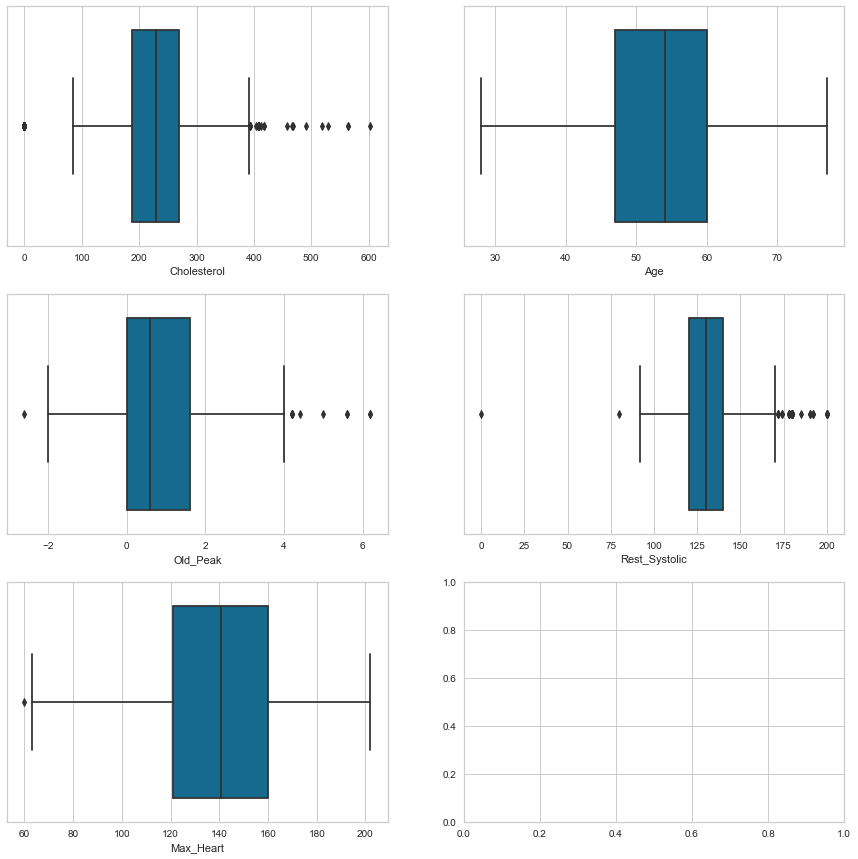

In [13]:
# Outliers?
plt.rcParams['figure.figsize'] = (15, 15)

fig, ax =plt.subplots(3,2)
sns.boxplot(cardiodf['Cholesterol'], ax=ax[0,0])
sns.boxplot(cardiodf['Age'], ax=ax[0,1])
sns.boxplot(cardiodf['Old_Peak'], ax=ax[1,0])
sns.boxplot(cardiodf['Rest_Systolic'], ax=ax[1,1])
sns.boxplot(cardiodf['Max_Heart'], ax=ax[2,0])
fig.show()

#### The condition, known as familial hypercholesterolemia, produces the highest cholesterol readings.  Some sufferers who inherit the condition-causing gene from both parents can record total cholesterol levels as high as 1000 mg/dL. Patients with readings that high often die in their 20s, according to CNN Health (Kenney, n.d., para. 5).  

So 1000 is not out of the question.  I like to use domain knowledge to remove outliers.

References:
Kenney, I. (n.d.).  What Is the Highest That Cholesterol Levels Can Go?  Retrieved from https://www.livestrong.com/article/230138-what-is-the-highest-number-that-cholesterol-can-go/

### Data Wrangling

In [14]:
# These need to be removed as a living person should have higher than 0 
# so these are likely missing recordings or data entry errors.
cardiodf = cardiodf[cardiodf.Cholesterol > 0]
cardio_orig_df = cardio_orig_df[cardio_orig_df.Cholesterol > 0]
cardiodf = cardiodf[cardiodf.Rest_Systolic > 0]
cardio_orig_df = cardio_orig_df[cardio_orig_df.Rest_Systolic > 0]

#### Recheck Box Plots

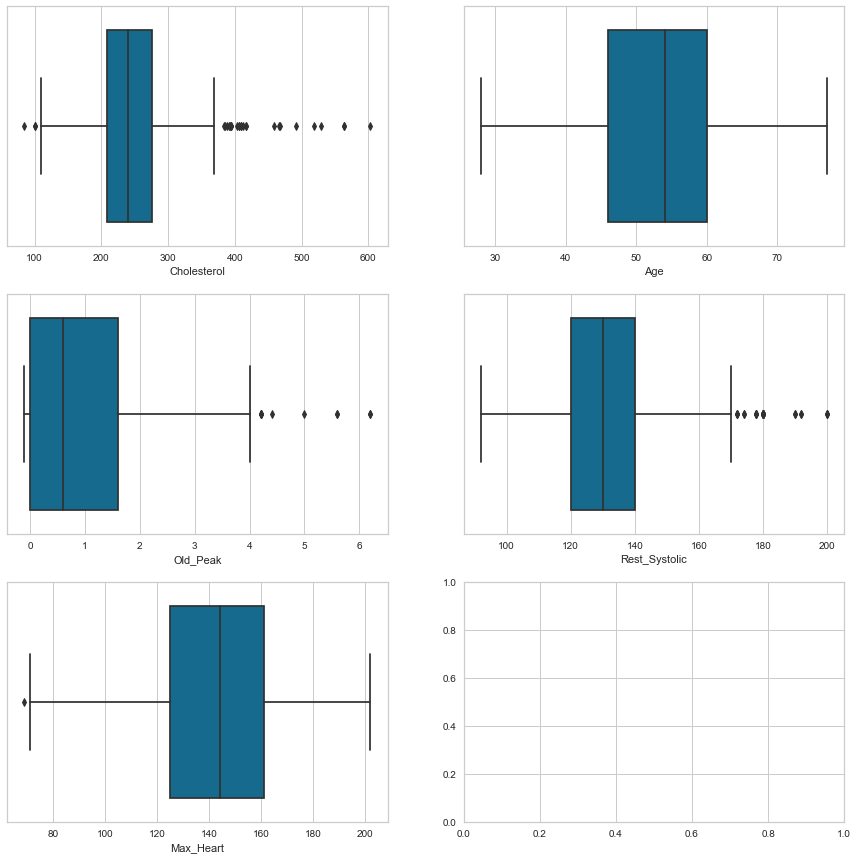

In [15]:
# Outliers?
# Some still exists, but based on domain knowledge seem more reasonable.
plt.rcParams['figure.figsize'] = (15, 15)

fig, ax =plt.subplots(3,2)
sns.boxplot(cardiodf['Cholesterol'], ax=ax[0,0])
sns.boxplot(cardiodf['Age'], ax=ax[0,1])
sns.boxplot(cardiodf['Old_Peak'], ax=ax[1,0])
sns.boxplot(cardiodf['Rest_Systolic'], ax=ax[1,1])
sns.boxplot(cardiodf['Max_Heart'], ax=ax[2,0])
fig.show()

In [16]:
print("Describe Data")
cardiodf.describe()

Describe Data


,Age,Rest_Systolic,Cholesterol,Max_Heart,Old_Peak
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,53.294695,132.571709,245.906680,142.730845,0.939194
std,9.415441,17.451133,57.244599,24.511837,1.093669
min,28.000000,92.000000,85.000000,69.000000,-0.100000
25%,46.000000,120.000000,209.000000,125.000000,0.000000
50%,54.000000,130.000000,240.000000,144.000000,0.600000
75%,60.000000,140.000000,276.000000,161.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [17]:
# Show the summarized data for the object data.
print("Summarized Data")
cardiodf.describe(include=['O'])
# There were no object datatypes.

Summarized Data


,Sex,Chest_Pain,Fast_Glucose,Rest_ECG,Ex_Angina,ST_Slope,Cardio
count,1018,1018,1018,1018,1018,1018,1018
unique,2,4,2,3,2,4,2
top,1,4,0,0,0,1,0
freq,748,499,853,577,641,480,541


### Graphs

5


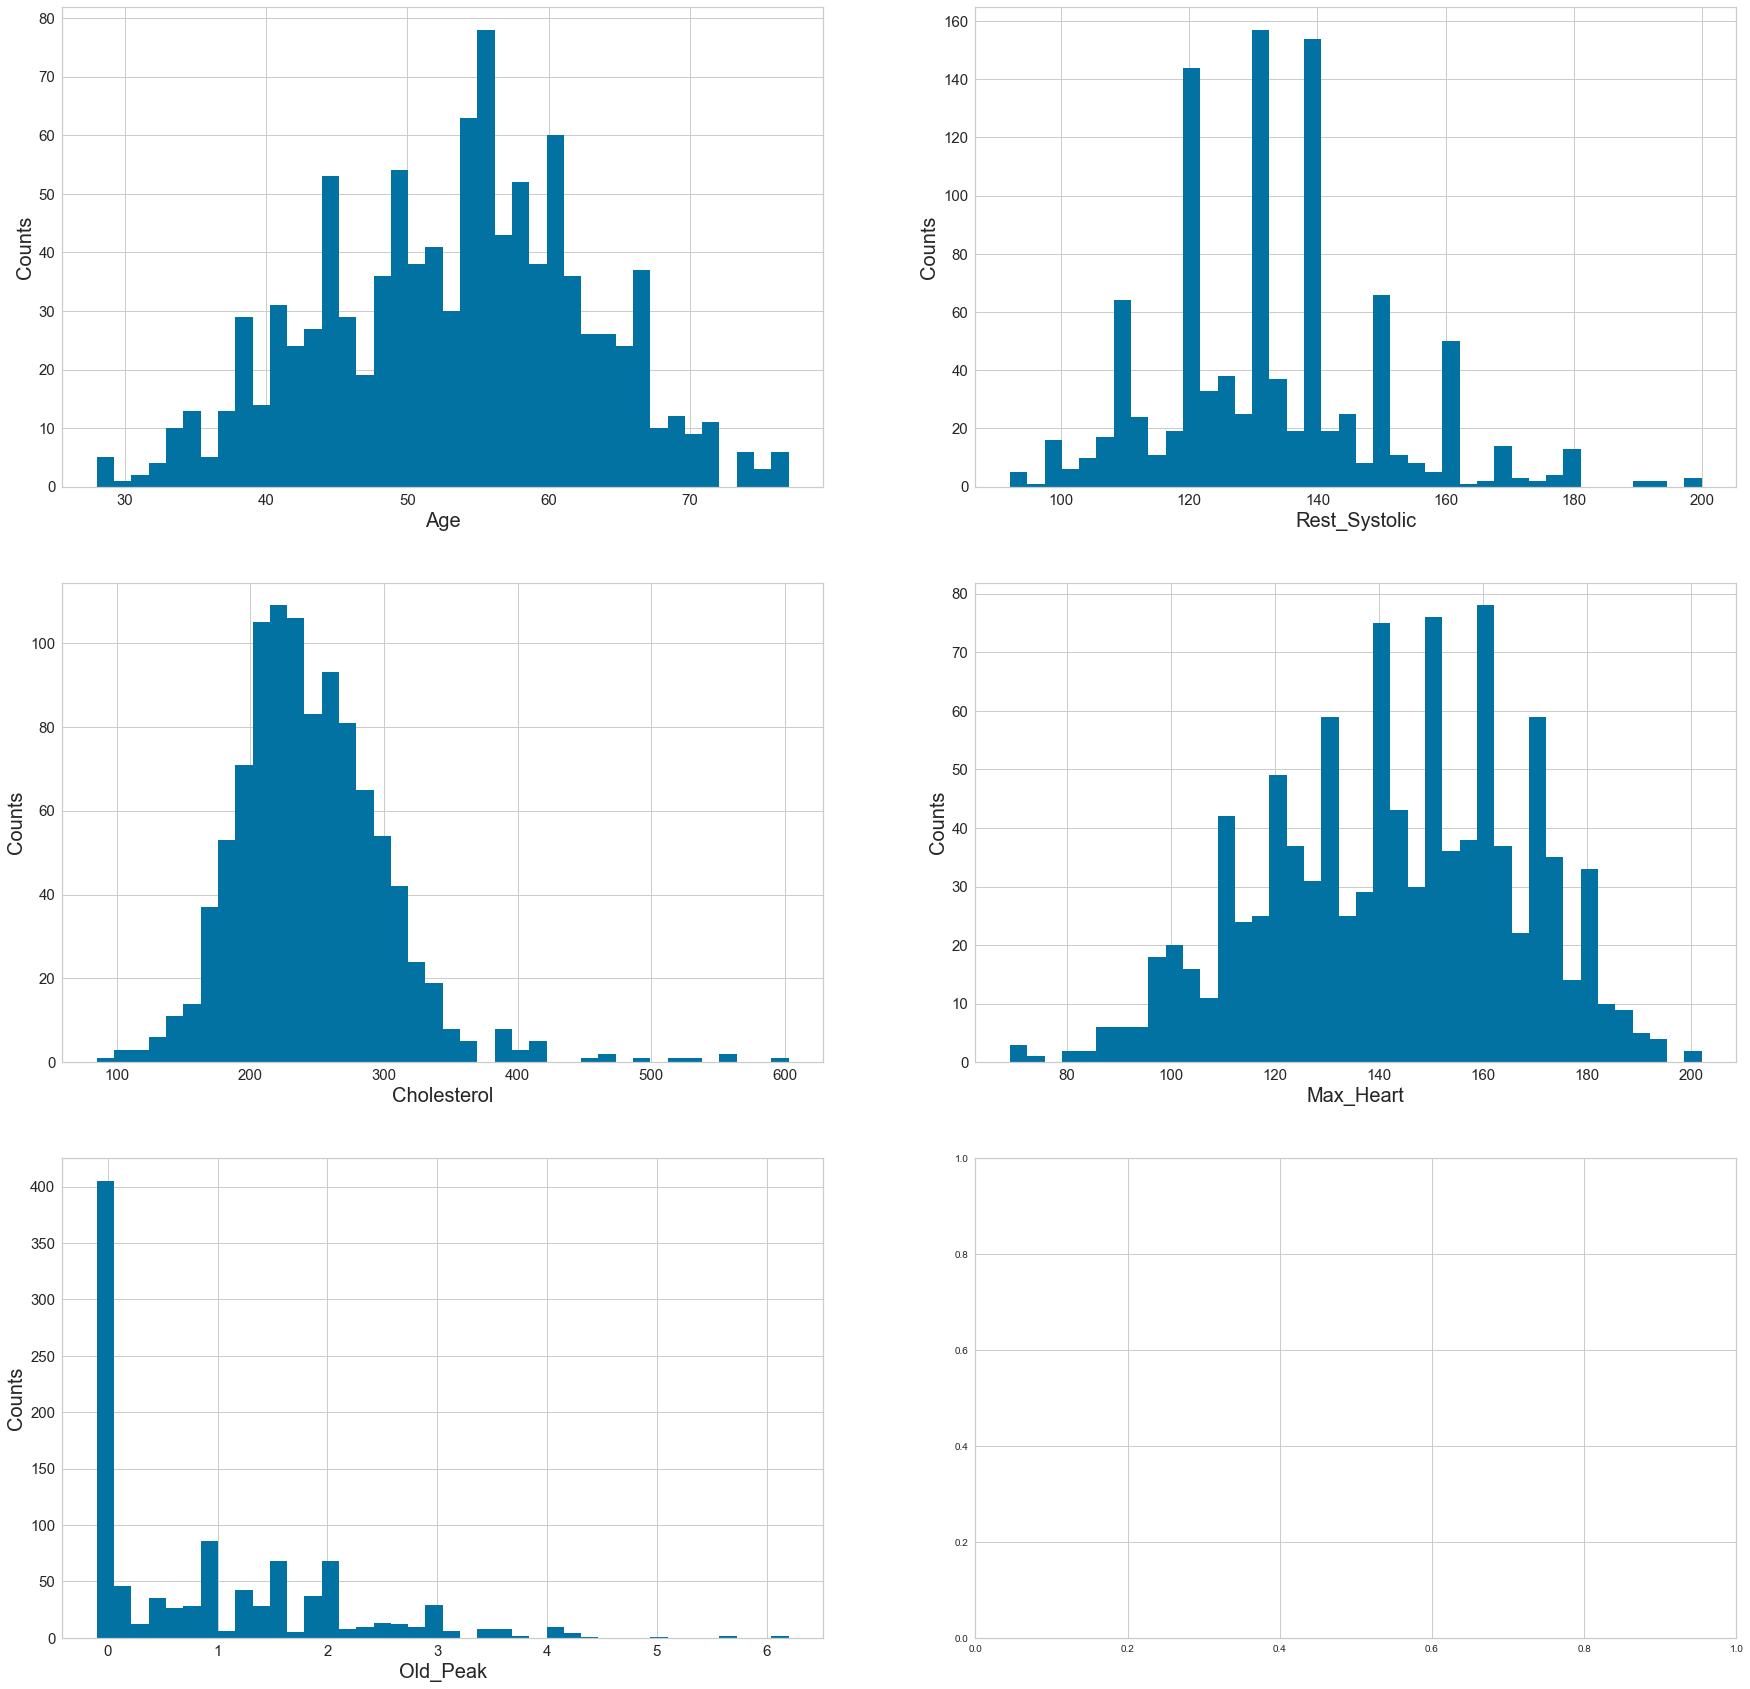

In [18]:
#Step 9: import visulization packages
# Load matplotlib
# import visulization packages

# set up the figure size
# %matplotlib inline
plt.rcParams['figure.figsize'] = (30, 30)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'Rest_Systolic', 'Cholesterol', 'Max_Heart', 'Old_Peak']
xaxes = num_features
count_features = len(num_features)
print(count_features)
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
loopcount = 0
for idx, ax in enumerate(axes):
    loopcount += 1
    if loopcount <= count_features:
        ax.hist(cardiodf[num_features[idx]].dropna(), bins=40)
        ax.set_xlabel(xaxes[idx], fontsize=20)
        ax.set_ylabel(yaxes[idx], fontsize=20)
        ax.tick_params(axis='both', labelsize=15)
    

In [19]:
print(num_features)
stats.kurtosis(cardiodf[num_features])

['Age', 'Rest_Systolic', 'Cholesterol', 'Max_Heart', 'Old_Peak']


array([-0.42657541,  0.75486874,  4.5979242 , -0.522194  ,  1.5011737 ])

In [20]:
print(num_features)
stats.skew(cardiodf[num_features])

['Age', 'Rest_Systolic', 'Cholesterol', 'Max_Heart', 'Old_Peak']


array([-0.12426938,  0.63978967,  1.21775103, -0.25722197,  1.2367836 ])

### The stats package confirms the graph finding non Gaussian Distributions by showing skew and kurtosis.

Skew and Kurtosis
skewness = 0 : normal
skewness > 0 : Right (Positive) Skew.
skewness < 0 : Left (Negative) Skew (Geeks for Geeks, n.d.)

Reference:

Geeks for Geeks, (n.d.). scipy stats.skew() | Python Retrieved from https://www.geeksforgeeks.org/scipy-stats-skew-python/

Link for scipy kurtosis documetation as fisher default caused me some confustion (after the R class):
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kurtosis.html#scipy.stats.kurtosis

Kertosis = 0 :normal distribution or mesokurtic distribution

Kertosis < 0 :light tail platykurtic distribution

Kertosis > 0 :heavy tail leptokurtic distribution (Glen, n.d.)

If Fisher’s definition(default) is used, then 3.0 is subtracted from the result to give 0.0 for a normal distribution.

Reference:

Glen, S. (n.d.). Kurtosis: Definition, Leptokurtic, Platykurtic. Retrived from https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/kurtosis-leptokurtic-platykurtic/

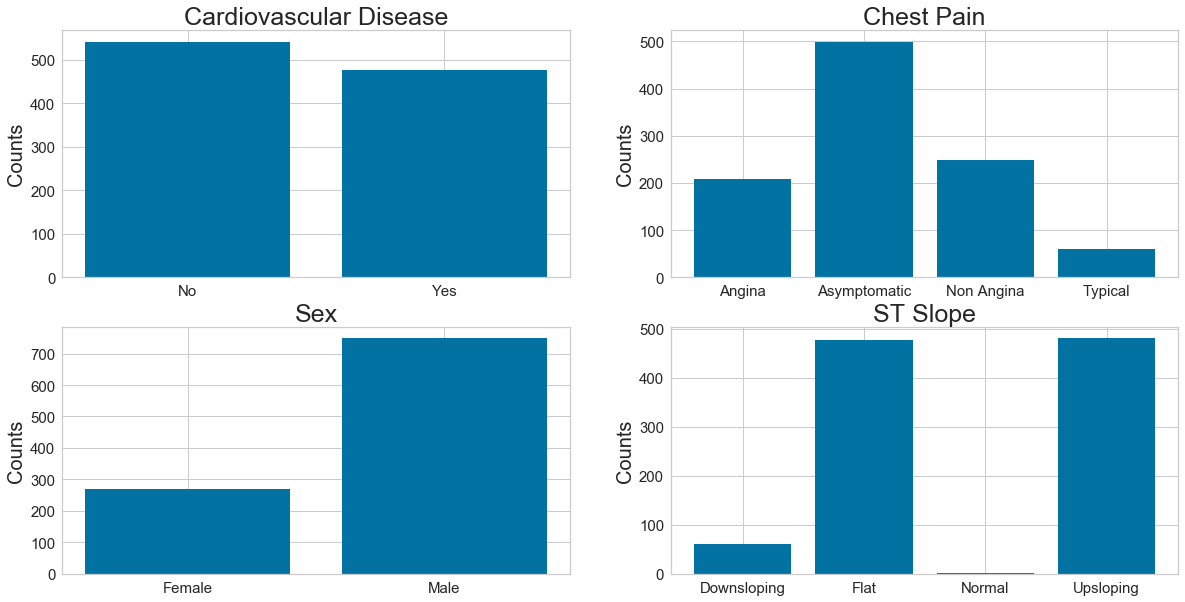

In [21]:
# Step 10 Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Survived = cardio_orig_df.replace({'Cardio': {1: 'Yes', 0: 'No'}}).groupby('Cardio').size().reset_index(name='Counts')['Cardio']
Y_Survived = cardio_orig_df.replace({'Cardio': {1: 'Yes', 0: 'No'}}).groupby('Cardio').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Cardiovascular Disease', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Chest = cardio_orig_df.replace({'Chest_Pain': {1: 'Typical', 2: 'Angina', 3: 'Non Angina', 4: 'Asymptomatic'}}).groupby('Chest_Pain').size().reset_index(name='Counts')['Chest_Pain']
Y_Chest = cardio_orig_df.replace({'Chest_Pain': {1: 'Typical', 2: 'Angina', 3: 'Non Angina', 4: 'Asymptomatic'}}).groupby('Chest_Pain').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Chest, Y_Chest)
axes[0, 1].set_title('Chest Pain', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = cardio_orig_df.replace({'Sex': {1: 'Male', 0: 'Female'}}).groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = cardio_orig_df.replace({'Sex': {1: 'Male', 0: 'Female'}}).groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer0
X_Slope = cardio_orig_df.replace({'ST_Slope': {0: 'Normal', 1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}}).groupby('ST_Slope').size().reset_index(name='Counts')['ST_Slope']
Y_Slope = cardio_orig_df.replace({'ST_Slope': {0: 'Normal', 1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}}).groupby('ST_Slope').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Slope, Y_Slope)
axes[1, 1].set_title('ST Slope', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()


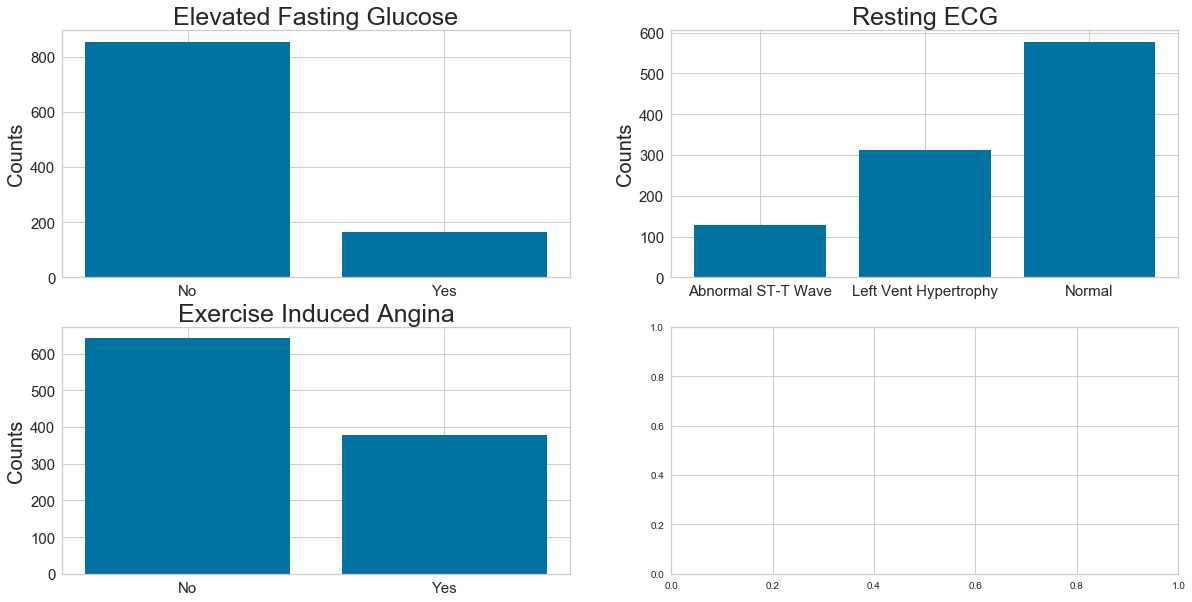

In [22]:
# Step 10 Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Gluc = cardio_orig_df.replace({'Fast_Glucose': {1: 'Yes', 0: 'No'}}).groupby('Fast_Glucose').size().reset_index(name='Counts')['Fast_Glucose']
Y_Gluc = cardio_orig_df.replace({'Fast_Glucose': {1: 'Yes', 0: 'No'}}).groupby('Fast_Glucose').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Gluc, Y_Gluc)
axes[0, 0].set_title('Elevated Fasting Glucose', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Ecg = cardio_orig_df.replace({'Rest_ECG': {0: 'Normal', 1: 'Abnormal ST-T Wave', 2: 'Left Vent Hypertrophy'}}).groupby('Rest_ECG').size().reset_index(name='Counts')['Rest_ECG']
Y_Ecg = cardio_orig_df.replace({'Rest_ECG': {0: 'Normal', 1: 'Abnormal ST-T Wave', 2: 'Left Vent Hypertrophy'}}).groupby('Rest_ECG').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Ecg, Y_Ecg)
axes[0, 1].set_title('Resting ECG', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Exa = cardio_orig_df.replace({'Ex_Angina': {1: 'Yes', 0: 'No'}}).groupby('Ex_Angina').size().reset_index(name='Counts')['Ex_Angina']
Y_Exa = cardio_orig_df.replace({'Ex_Angina': {1: 'Yes', 0: 'No'}}).groupby('Ex_Angina').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Exa, Y_Exa)
axes[1, 0].set_title('Exercise Induced Angina', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


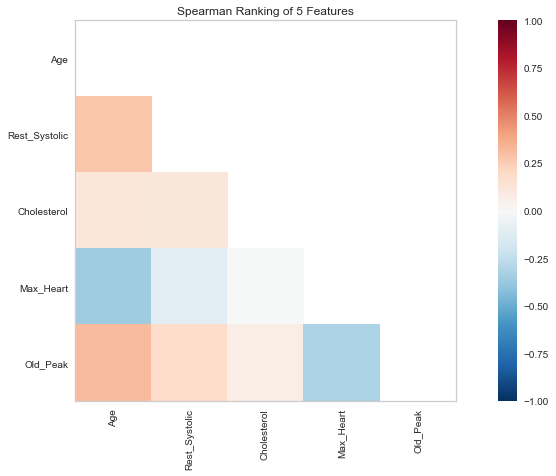

In [23]:
# Given the non normal distribution above, I am selecting Spearman
#Step 11: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)


# extract the numpy arrays from the data frame
# X = data[num_features].as_matrix()
X = cardiodf[num_features].values
# print(X)
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='spearman')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
#plt.show()

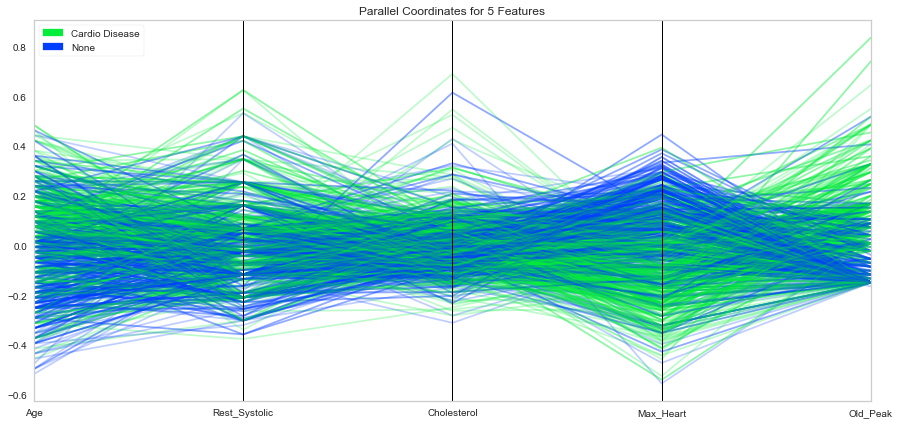

In [24]:
# Step 12 Went back to the original code and just changed values.
# I think this is correct as it matches https://www.districtdatalabs.com/how-to-start-your-first-data-science-project

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
# from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
# from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['None', 'Cardio Disease']
num_features = ['Age', 'Rest_Systolic', 'Cholesterol', 'Max_Heart', 'Old_Peak']

# copy data to a new dataframe
data_norm = cardio_orig_df.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (cardio_orig_df[feature] - cardio_orig_df[feature].mean(skipna=True)) / (cardio_orig_df[feature].max(skipna=True) - cardio_orig_df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = cardio_orig_df.Cardio.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

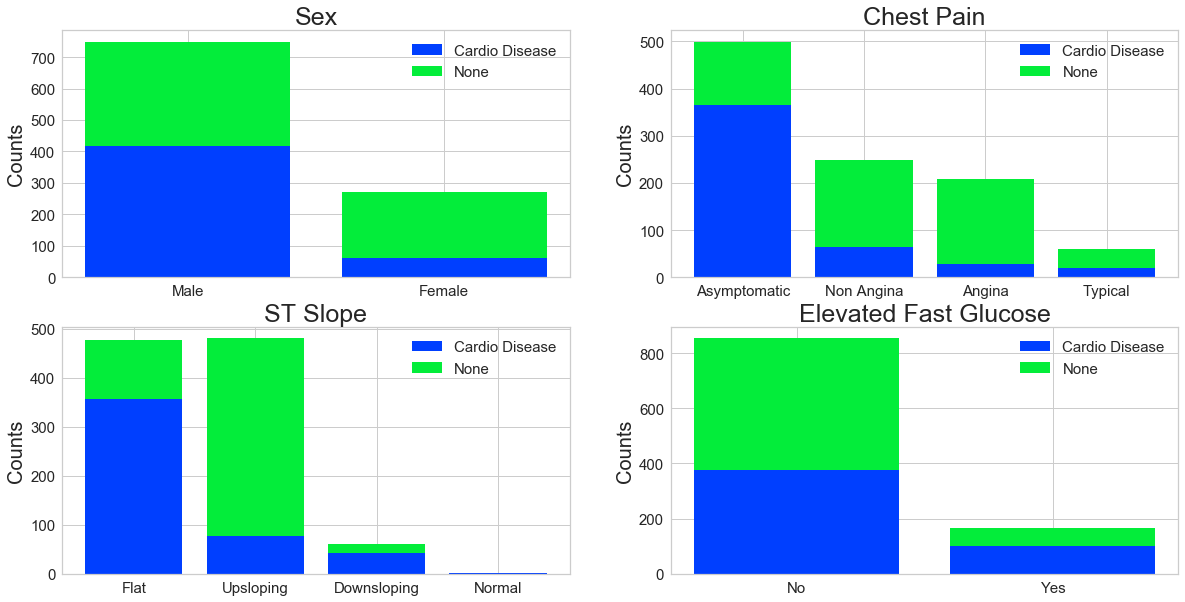

In [25]:
# Step 13 - stacked bar charts to compare survived/not survived
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_car = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Sex': {0: 'Female', 1: 'Male'}})[cardio_orig_df['Cardio']==1]['Sex'].value_counts()
Sex_not = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Sex': {0: 'Female', 1: 'Male'}})[cardio_orig_df['Cardio']==0]['Sex'].value_counts()
Sex_not = Sex_not.reindex(index = Sex_car.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_car.index, Sex_car.values)
p2 = axes[0, 0].bar(Sex_not.index, Sex_not.values, bottom=Sex_car.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Cardio Disease', 'None'), fontsize = 15)

# make the data read to feed into the visualizer
Pain_car = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Chest_Pain': {1: 'Typical', 2: 'Angina', 3: 'Non Angina', 4: 'Asymptomatic'}})[cardio_orig_df['Cardio']==1]['Chest_Pain'].value_counts()
Pain_not = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Chest_Pain': {1: 'Typical', 2: 'Angina', 3: 'Non Angina', 4: 'Asymptomatic'}})[cardio_orig_df['Cardio']==0]['Chest_Pain'].value_counts()
Pain_not = Pain_not.reindex(index = Pain_car.index)
# make the bar plot
p3 = axes[0, 1].bar(Pain_car.index, Pain_car.values)
p4 = axes[0, 1].bar(Pain_not.index, Pain_not.values, bottom=Pain_car.values)
axes[0, 1].set_title('Chest Pain', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Cardio Disease', 'None'), fontsize = 15)

# make the data read to feed into the visualizer
Slope_car = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'ST_Slope': {0: 'Normal', 1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}})[cardio_orig_df['Cardio']==1]['ST_Slope'].value_counts()
Slope_not = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'ST_Slope': {0: 'Normal', 1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}})[cardio_orig_df['Cardio']==0]['ST_Slope'].value_counts()
Slope_not = Slope_not.reindex(index = Slope_car.index)
# make the bar plot
p5 = axes[1, 0].bar(Slope_car.index, Slope_car.values)
p6 = axes[1, 0].bar(Slope_not.index, Slope_not.values, bottom=Slope_car.values)
axes[1, 0].set_title('ST Slope', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Cardio Disease', 'None'), fontsize = 15)

# make the data read to feed into the visualizer
Gluc_car = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Fast_Glucose': {0: 'No', 1: 'Yes'}})[cardio_orig_df['Cardio']==1]['Fast_Glucose'].value_counts()
Gluc_not = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Fast_Glucose': {0: 'No', 1: 'Yes'}})[cardio_orig_df['Cardio']==0]['Fast_Glucose'].value_counts()
Gluc_not = Gluc_not.reindex(index = Gluc_car.index)
# make the bar plot
p7 = axes[1, 1].bar(Gluc_car.index, Gluc_car.values)
p8 = axes[1, 1].bar(Gluc_not.index, Gluc_not.values, bottom=Gluc_car.values)
axes[1, 1].set_title('Elevated Fast Glucose', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Cardio Disease', 'None'), fontsize = 15)



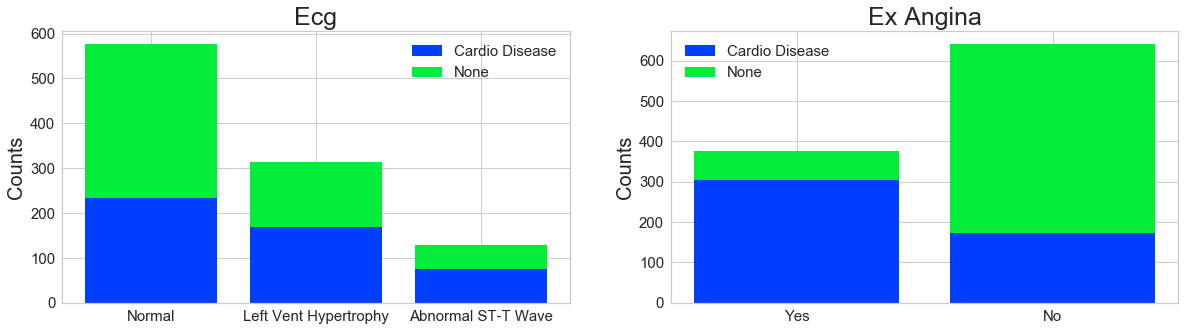

In [26]:
# Step 13 - stacked bar charts to compare survived/not survived
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,5)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# make the data read to feed into the visulizer
Ecg_car = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Rest_ECG': {0: 'Normal', 1: 'Abnormal ST-T Wave', 2: 'Left Vent Hypertrophy'}})[cardio_orig_df['Cardio']==1]['Rest_ECG'].value_counts()
Ecg_not = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Rest_ECG': {0: 'Normal', 1: 'Abnormal ST-T Wave', 2: 'Left Vent Hypertrophy'}})[cardio_orig_df['Cardio']==0]['Rest_ECG'].value_counts()
Ecg_not = Ecg_not.reindex(index = Ecg_car.index)
# make the bar plot
p1 = axes[0].bar(Ecg_car.index, Ecg_car.values)
p2 = axes[0].bar(Ecg_not.index, Ecg_not.values, bottom=Ecg_car.values)
axes[0].set_title('Ecg', fontsize=25)
axes[0].set_ylabel('Counts', fontsize=20)
axes[0].tick_params(axis='both', labelsize=15)
axes[0].legend((p1[0], p2[0]), ('Cardio Disease', 'None'), fontsize = 15)

# make the data read to feed into the visualizer
Ang_car = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Ex_Angina': {1: 'Yes', 0: 'No'}})[cardio_orig_df['Cardio']==1]['Ex_Angina'].value_counts()
Ang_not = cardio_orig_df.replace({'Cardio': {1: 'Cardio Disease', 0: 'None'}}).replace({'Ex_Angina': {1: 'Yes', 0: 'No'}})[cardio_orig_df['Cardio']==0]['Ex_Angina'].value_counts()
Ang_not = Ang_not.reindex(index = Ang_car.index)
# make the bar plot
p3 = axes[1].bar(Ang_car.index, Ang_car.values)
p4 = axes[1].bar(Ang_not.index, Ang_not.values, bottom=Ang_car.values)
axes[1].set_title('Ex Angina', fontsize=25)
axes[1].set_ylabel('Counts', fontsize=20)
axes[1].tick_params(axis='both', labelsize=15)
axes[1].legend((p3[0], p4[0]), ('Cardio Disease', 'None'), fontsize = 15)


### One Hot Encoding of Categorical Variables then merge each into the data frame

In [27]:
# Step 14
cardio_oneh_df = cardio_orig_df.copy()
cardio_oneh_df.dtypes

Age                int64
Sex                int64
Chest_Pain         int64
Rest_Systolic      int64
Cholesterol        int64
Fast_Glucose       int64
Rest_ECG           int64
Max_Heart          int64
Ex_Angina          int64
Old_Peak         float64
ST_Slope           int64
Cardio             int64
dtype: object

In [28]:
cardio_oneh_df['Rest_ECG']

0       0
1       0
2       1
3       0
4       0
       ..
1185    0
1186    0
1187    0
1188    2
1189    0
Name: Rest_ECG, Length: 1018, dtype: int64

In [29]:
ecg_y = pd.get_dummies(cardio_oneh_df['Rest_ECG'], prefix='Rest_ECG')
print(ecg_y)

      Rest_ECG_0  Rest_ECG_1  Rest_ECG_2
0              1           0           0
1              1           0           0
2              0           1           0
3              1           0           0
4              1           0           0
...          ...         ...         ...
1185           1           0           0
1186           1           0           0
1187           1           0           0
1188           0           0           1
1189           1           0           0

[1018 rows x 3 columns]


In [30]:
cardio_oneh_df = pd.concat([cardio_oneh_df, ecg_y], axis=1)

In [31]:
cardio_oneh_df['ST_Slope']

0       1
1       2
2       1
3       2
4       1
       ..
1185    2
1186    2
1187    2
1188    2
1189    1
Name: ST_Slope, Length: 1018, dtype: int64

In [32]:
# {'ST Slope': {0: 'Normal', 1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}
slope_y = pd.get_dummies(cardio_oneh_df['ST_Slope'], prefix='ST_Slope')
print(slope_y)

      ST_Slope_0  ST_Slope_1  ST_Slope_2  ST_Slope_3
0              0           1           0           0
1              0           0           1           0
2              0           1           0           0
3              0           0           1           0
4              0           1           0           0
...          ...         ...         ...         ...
1185           0           0           1           0
1186           0           0           1           0
1187           0           0           1           0
1188           0           0           1           0
1189           0           1           0           0

[1018 rows x 4 columns]


In [33]:
cardiodf = pd.concat([cardio_oneh_df, slope_y], axis=1)

In [34]:
cardio_oneh_df['Chest_Pain']

0       2
1       3
2       2
3       4
4       3
       ..
1185    1
1186    4
1187    4
1188    2
1189    3
Name: Chest_Pain, Length: 1018, dtype: int64

In [35]:
# {'Chest Pain': {1: 'Typical', 2: 'Angina', 3: 'Non Angina', 4: 'Asymptomatic'}
pain_y = pd.get_dummies(cardio_oneh_df['Chest_Pain'], prefix='Chest_Pain')
print(pain_y)

      Chest_Pain_1  Chest_Pain_2  Chest_Pain_3  Chest_Pain_4
0                0             1             0             0
1                0             0             1             0
2                0             1             0             0
3                0             0             0             1
4                0             0             1             0
...            ...           ...           ...           ...
1185             1             0             0             0
1186             0             0             0             1
1187             0             0             0             1
1188             0             1             0             0
1189             0             0             1             0

[1018 rows x 4 columns]


In [36]:
cardio_oneh_df = pd.concat([cardio_oneh_df, pain_y], axis=1)

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(cardio_oneh_df.head(5))

,Age,Sex,Chest_Pain,Rest_Systolic,Cholesterol,Fast_Glucose,Rest_ECG,Max_Heart,Ex_Angina,Old_Peak,ST_Slope,Cardio,Rest_ECG_0,Rest_ECG_1,Rest_ECG_2,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Chest_Pain_4
0,40,1,2,140,289,0,0,172,0,0.0,1,0,1,0,0,0,1,0,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1,1,0,0,0,0,1,0
2,37,1,2,130,283,0,1,98,0,0.0,1,0,0,1,0,0,1,0,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1,1,0,0,0,0,0,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0,1,0,0,0,0,1,0


In [38]:
cardio_reduct_df = cardio_oneh_df.copy()

In [39]:
# Drop variables that have been converted via 1-hot
cardio_reduct_df = cardio_reduct_df.drop(columns=['Rest_ECG', 'ST_Slope','Chest_Pain'])

In [40]:
# Take a look
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(cardio_reduct_df.head(5))

,Age,Sex,Rest_Systolic,Cholesterol,Fast_Glucose,Max_Heart,Ex_Angina,Old_Peak,Cardio,Rest_ECG_0,Rest_ECG_1,Rest_ECG_2,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Chest_Pain_4
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,0,1,0,0,0,0,1,0


In [41]:
cardio_reduct_df.dtypes

Age                int64
Sex                int64
Rest_Systolic      int64
Cholesterol        int64
Fast_Glucose       int64
Max_Heart          int64
Ex_Angina          int64
Old_Peak         float64
Cardio             int64
Rest_ECG_0         uint8
Rest_ECG_1         uint8
Rest_ECG_2         uint8
Chest_Pain_1       uint8
Chest_Pain_2       uint8
Chest_Pain_3       uint8
Chest_Pain_4       uint8
dtype: object

### Missingness Analysis using missingno matrix graph indicates no missing data.

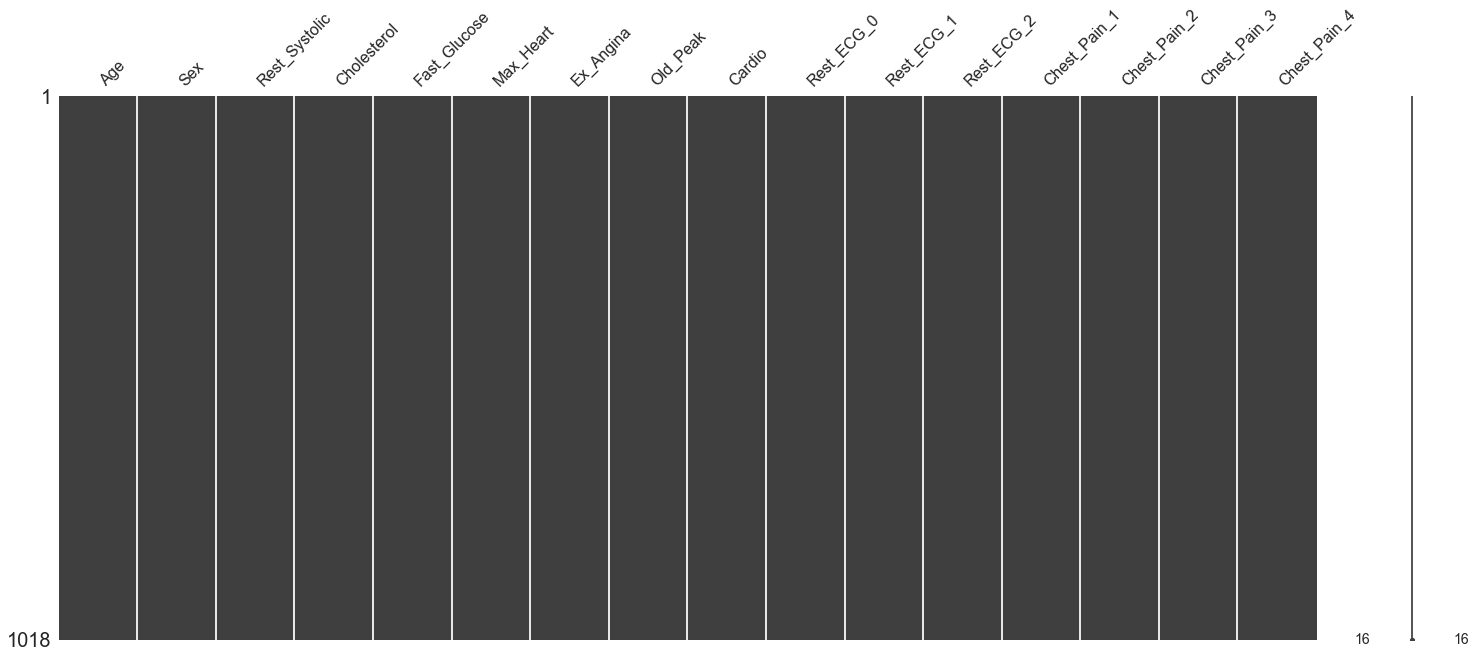

In [42]:
# Step 15
msno.matrix(cardio_reduct_df)

### Now look at the correlation heatmap with the one-hot variables.

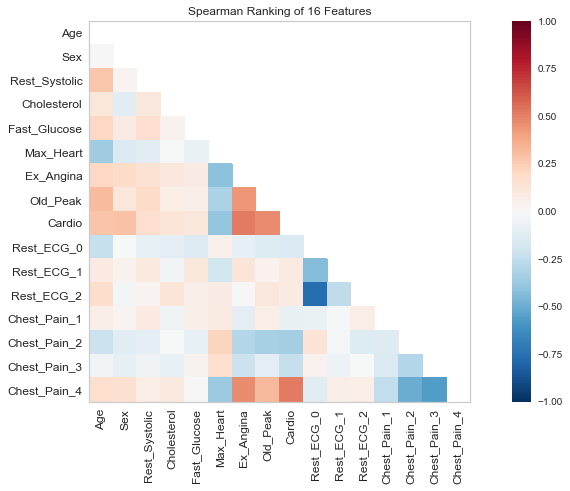

In [43]:
# Given the non normal distribution above, I am selecting Spearman
#Step 16: Pearson Ranking
#set up the figure size
#%matplotlib inline
# fig, ax=plt.subplots(figsize=(30,20))
plt.rcParams['figure.figsize'] = (15,7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#
# import the package for visulization of the correlation
# from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
# X = data[num_features].as_matrix()
X = cardio_reduct_df.values
# print(X)
# cardio_reduct_df.columns
# num_features = 20
# len(cardio_reduct_df.columns)
# print(X)
# instantiate the visualizer with the Covariance ranking algorithm
# visualizer = Rank2D(features=num_features, algorithm='spearman')
visualizer = Rank2D(features=cardio_reduct_df.columns, algorithm='spearman')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
for label in visualizer.ax.texts:
    print(label)
visualizer.poof() # Draw/show/poof the data
#plt.show()


In [44]:
# Take a look at correlation numbers
cardio_reduct_df.corr(method='spearman')

,Age,Sex,Rest_Systolic,Cholesterol,Fast_Glucose,Max_Heart,Ex_Angina,Old_Peak,Cardio,Rest_ECG_0,Rest_ECG_1,Rest_ECG_2,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Chest_Pain_4
Age,1.000000,0.001152,0.280806,0.119794,0.207490,-0.351828,0.203271,0.318891,0.285252,-0.229327,0.087238,0.183579,0.067909,-0.211833,-0.037449,0.171122
Sex,0.001152,1.000000,0.028915,-0.110978,0.083098,-0.153305,0.193492,0.120363,0.296594,-0.004332,0.039926,-0.024035,0.029803,-0.113307,-0.092967,0.157341
Rest_Systolic,0.280806,0.028915,1.000000,0.114556,0.164507,-0.116548,0.152601,0.189639,0.168199,-0.085742,0.094695,0.024034,0.090088,-0.095781,-0.043587,0.072098
Cholesterol,0.119794,-0.110978,0.114556,1.000000,0.041081,-0.002944,0.106501,0.073571,0.125181,-0.095493,-0.036881,0.129044,-0.040675,-0.005586,-0.083653,0.095756
Fast_Glucose,0.207490,0.083098,0.164507,0.041081,1.000000,-0.070295,0.082218,0.067734,0.115842,-0.131909,0.114591,0.059314,0.057423,-0.078366,0.034983,0.005976
Max_Heart,-0.351828,-0.153305,-0.116548,-0.002944,-0.070295,1.000000,-0.413435,-0.317901,-0.395255,0.049861,-0.191743,0.084227,0.092978,0.222823,0.169554,-0.369978
Ex_Angina,0.203271,0.193492,0.152601,0.106501,0.082218,-0.413435,1.000000,0.439780,0.519148,-0.089013,0.126374,0.004785,-0.107911,-0.289075,-0.213969,0.468791
Old_Peak,0.318891,0.120363,0.189639,0.073571,0.067734,-0.317901,0.439780,1.000000,0.473955,-0.134194,0.041079,0.114587,0.076480,-0.331732,-0.106640,0.323426
Cardio,0.285252,0.296594,0.168199,0.125181,0.115842,-0.395255,0.519148,0.473955,1.000000,-0.144456,0.089200,0.091032,-0.071184,-0.340806,-0.241221,0.516586
Rest_ECG_0,-0.229327,-0.004332,-0.085742,-0.095493,-0.131909,0.049861,-0.089013,-0.134194,-0.144456,1.000000,-0.433789,-0.762160,-0.063268,0.135159,0.040895,-0.114336


### Feature Selection

In [45]:
# Step 17
# Split out Target and Features
all_features=cardio_reduct_df.copy()
all_features=all_features.drop(columns=['Cardio'])
target = cardio_reduct_df['Cardio']

In [46]:
all_features

,Age,Sex,Rest_Systolic,Cholesterol,Fast_Glucose,Max_Heart,Ex_Angina,Old_Peak,Rest_ECG_0,Rest_ECG_1,Rest_ECG_2,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Chest_Pain_4
0,40,1,140,289,0,172,0,0.0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,1,0,0
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,110,264,0,132,0,1.2,1,0,0,1,0,0,0
1186,68,1,144,193,1,141,0,3.4,1,0,0,0,0,0,1
1187,57,1,130,131,0,115,1,1.2,1,0,0,0,0,0,1
1188,57,0,130,236,0,174,0,0.0,0,0,1,0,1,0,0


In [47]:
# Use Random Forrest for Feature Reduction
# from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(all_features,target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

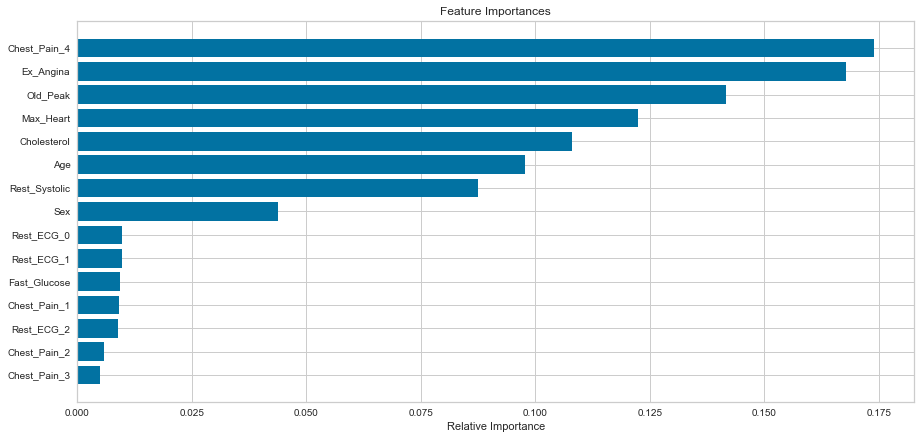

In [48]:
# Graph what the model found
features = all_features.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [49]:
# Let SelectFromModel make the cut
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model) 
Fit = feature.fit_transform(all_features, target)
support=feature.get_support()
feature_list=all_features.loc[:,support].columns.tolist()
print(feature_list)
print(str(len(feature_list)), 'selected features')

['Age', 'Rest_Systolic', 'Cholesterol', 'Max_Heart', 'Ex_Angina', 'Old_Peak', 'Chest_Pain_4']
7 selected features


In [50]:
X = cardio_reduct_df[feature_list]

In [51]:
X.head(5)

,Age,Rest_Systolic,Cholesterol,Max_Heart,Ex_Angina,Old_Peak,Chest_Pain_4
0,40,140,289,172,0,0.0,0
1,49,160,180,156,0,1.0,0
2,37,130,283,98,0,0.0,0
3,48,138,214,108,1,1.5,1
4,54,150,195,122,0,0.0,0


In [52]:
X.dtypes

Age                int64
Rest_Systolic      int64
Cholesterol        int64
Max_Heart          int64
Ex_Angina          int64
Old_Peak         float64
Chest_Pain_4       uint8
dtype: object

In [53]:
y = cardio_reduct_df[['Cardio']]
#.astype(int)
# X['Ex_Angina'] = cardio_reduct_df[['Ex_Angina']].astype(int)

In [54]:
X.dtypes

Age                int64
Rest_Systolic      int64
Cholesterol        int64
Max_Heart          int64
Ex_Angina          int64
Old_Peak         float64
Chest_Pain_4       uint8
dtype: object

In [55]:
y.head(5)

,Cardio
0,0
1,1
2,0
3,1
4,0


Logistic Regression: 0.795591 (0.034004)
Random Forest: 0.874214 (0.021910)
XGBoost: 0.868934 (0.029387)
SVM: 0.688004 (0.035737)


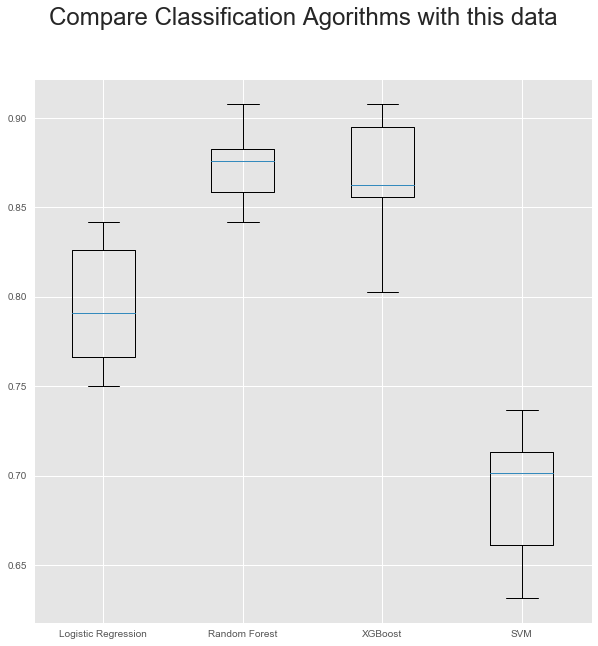

In [56]:
# Compare a few models - Model Selection
plt.style.use('ggplot')
# load datasets
plt.rcParams['font.size'] = 20
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('SVM', svm.SVC()))
#MLPClassifier
# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Compare Classification Agorithms with this data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### XGB and Random Forrest are worth further exploration

In [57]:
# Scale the data - I tested to see if it changed the results
# It is not required for Random Forest and or XGBoost (as it is a decision tree as well),
# but I did a few tests that supported that.
# There was no significant difference 
# X = scale(X) 

# Prepare for model
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [58]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [59]:
print(rfc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [60]:
# XGBoost model creation
# XGBoost provides a parallel tree boosting
# Boosting is a method of converting weak learners into strong learners. 
xgb =  XGBClassifier()
xgb.fit(X_train,y_train)
# predictions
xgb_predict = xgb.predict(X_test)

In [61]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
xgb_cv_score = cross_val_score(xgb, X, y, cv=10, scoring='roc_auc')

In [62]:
print("=== Random Forest Model Results ===")
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Random Forest Model Results ===
=== Confusion Matrix ===
[[156  13]
 [ 34 133]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       169
           1       0.91      0.80      0.85       167

    accuracy                           0.86       336
   macro avg       0.87      0.86      0.86       336
weighted avg       0.87      0.86      0.86       336



=== All AUC Scores ===
[0.86673114 0.86361883 0.92978395 0.89197531 0.96701389 1.
 1.         0.98881173 1.         0.96847912]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9476413962318219


In [63]:
print("=== XGBoost Model Results ===")
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, xgb_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, xgb_predict))
print('\n')
print("=== All AUC Scores ===")
print(xgb_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - XGBoost: ", xgb_cv_score.mean())

=== XGBoost Model Results ===
=== Confusion Matrix ===
[[154  15]
 [ 36 131]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       169
           1       0.90      0.78      0.84       167

    accuracy                           0.85       336
   macro avg       0.85      0.85      0.85       336
weighted avg       0.85      0.85      0.85       336



=== All AUC Scores ===
[0.87388781 0.83256173 0.91165123 0.87037037 0.92361111 1.
 1.         0.99382716 1.         0.96335697]


=== Mean AUC Score ===
Mean AUC Score - XGBoost:  0.9369266393246889


#### Moving forward with Random Forest Regression - XGBoost was a very close contender.

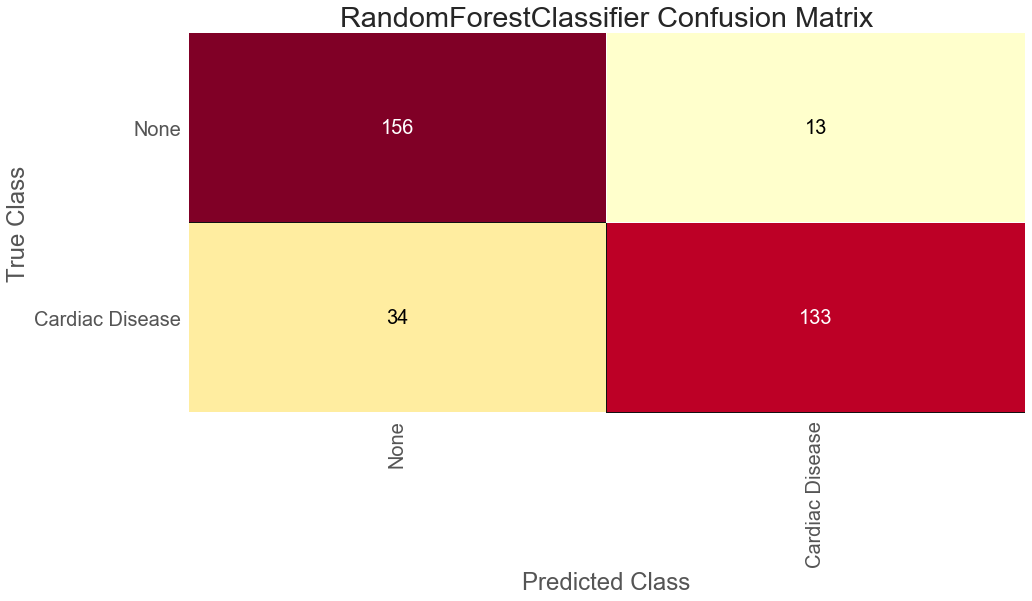

In [64]:
#The ConfusionMatrix visualizer taxes a model
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
classes = ['None','Cardiac Disease']
cm = ConfusionMatrix(rfc, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

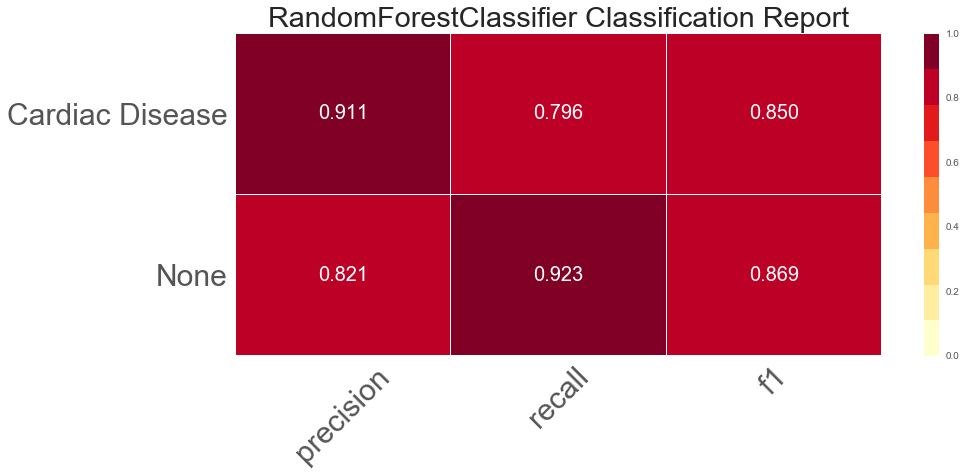

In [65]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# Instantiate the visualizer
visualizer = ClassificationReport(rfc, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

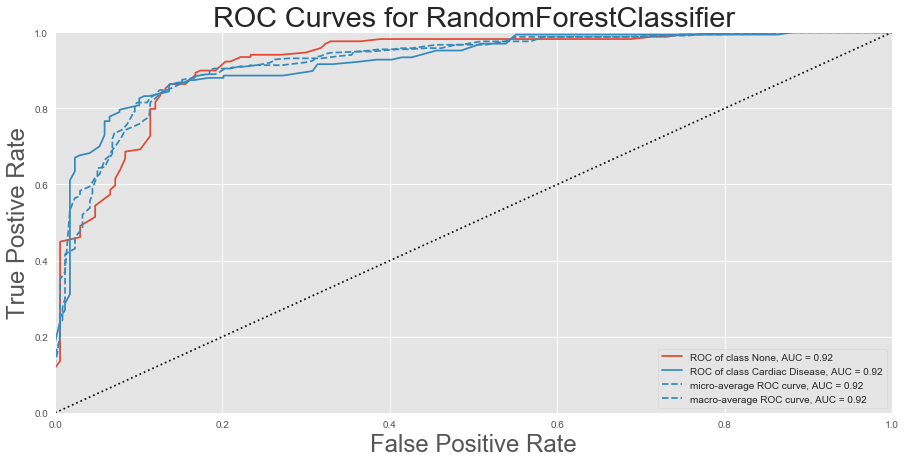

In [66]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(rfc, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

#### Test out Hyperparameter options with GridSearchCV

In [67]:
# Can we do better w/ hyperparameters
Hrfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [100,125,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,50,100],
    'min_samples_split' : [1,2,3],    
#    'min_samples_leaf' : [1,2,3],  Always seems to recommend 1
#    'criterion' :['gini', 'entropy'], Almost always recommends gini
    'bootstrap' :[True, False]
}
CV_rfc = GridSearchCV(estimator=Hrfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [68]:
CV_rfc.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 150}

In [69]:
# random forest model creation
Hrfc = RandomForestClassifier(**CV_rfc.best_params_)
Hrfc.fit(X_train,y_train)
# predictions
Hrfc_predict = Hrfc.predict(X_test)

In [70]:
Hrfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
Hrfc_cv_score = cross_val_score(Hrfc, X, y, cv=10, scoring='roc_auc')

In [72]:
print("=== Hyperparameterized Random Forest Model Results ===")
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, Hrfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, Hrfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", Hrfc_cv_score.mean())

=== Hyperparameterized Random Forest Model Results ===
=== Confusion Matrix ===
[[157  12]
 [ 33 134]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       169
           1       0.92      0.80      0.86       167

    accuracy                           0.87       336
   macro avg       0.87      0.87      0.87       336
weighted avg       0.87      0.87      0.87       336



=== All AUC Scores ===
[0.86673114 0.86361883 0.92978395 0.89197531 0.96701389 1.
 1.         0.98881173 1.         0.96847912]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9444612421496288


#### Not worth deviating from defaults - Somtimes better but not consistently better on subsequent runs.


#### How about Neural Network algorithms?  Any improvement over the traditional methods above?
Tried MLP Classifier (neural net) but results were not as good as Random Forest.

In [73]:
mlp = MLPClassifier(hidden_layer_sizes =[500,500,500])
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[500, 500, 500], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [74]:
# Make predictions
mlp_pred = mlp.predict(X_test)

In [75]:
# Show the matrix
print(confusion_matrix(y_test,mlp_pred))

[[158  11]
 [ 82  85]]


In [76]:
# Accuracy Reporting
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       169
           1       0.89      0.51      0.65       167

    accuracy                           0.72       336
   macro avg       0.77      0.72      0.71       336
weighted avg       0.77      0.72      0.71       336



#### Save the reduced dataframe and model as a pickle file for later use.

In [77]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(cardio_reduct_df.head(5))

,Age,Sex,Rest_Systolic,Cholesterol,Fast_Glucose,Max_Heart,Ex_Angina,Old_Peak,Cardio,Rest_ECG_0,Rest_ECG_1,Rest_ECG_2,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Chest_Pain_4
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,0,1,0,0,0,0,1,0


In [78]:
# cardio_reduct_df
cardio_reduct_df.to_pickle('cardio_reduct_df.pickle')

In [79]:
# Save the wining model as a pickle file
filename = 'finalized_model.pickle'
pickle.dump(rfc, open(filename, 'wb'))